In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_feat = pd.read_csv("power_consumption_g3_feat.csv")
df_feat

,Date,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
0,2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300
1,2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630
2,2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322
3,2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111
4,2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900
...,...,...,...,...,...,...
52411,2017-05-14 02:20:00,23.58,43.10,0.075,0.110,0.122
52412,2017-11-17 19:20:00,17.30,76.50,0.075,0.040,0.148
52413,2017-03-21 12:10:00,17.90,50.28,0.081,837.000,296.700
52414,2017-07-28 05:10:00,25.23,61.32,4.907,0.091,0.119


In [4]:
df_feat["Date"] = pd.to_datetime(df_feat["Date"])
df_feat.set_index(keys=["Date"], inplace=True)
df_feat.sort_index(inplace=True)
df_feat

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows
Date,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085
...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074


In [5]:
df_target = pd.read_csv("power_consumption_g3.csv")
df_target

,Date,SolarPower
0,2017-06-22 11:50:00,35818.80795
1,2017-04-24 22:50:00,34628.20237
2,2017-11-05 09:00:00,22781.53846
3,2017-10-19 23:20:00,31925.77681
4,2017-03-25 17:10:00,30246.12766
...,...,...
52411,2017-02-08 16:10:00,31808.13559
52412,2017-07-04 17:40:00,35816.61130
52413,2017-07-02 17:00:00,31185.64784
52414,2017-08-02 16:40:00,39463.35183


In [6]:
df_target["Date"] = pd.to_datetime(df_target["Date"])
df_target.set_index(keys=["Date"], inplace=True)
df_target.sort_index(inplace=True)
df_target

,SolarPower
Date,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620
...,...
2017-12-30 23:10:00,31160.45627
2017-12-30 23:20:00,30430.41825
2017-12-30 23:30:00,29590.87452


In [7]:
df = pd.merge(left=df_feat, right=df_target, right_index=True, left_index=True)
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096,31160.45627
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452


In [8]:
df.isnull().sum()

Temperature            559
Humidity               499
WindSpeed              529
GeneralDiffuseFlows    524
DiffuseFlows           505
SolarPower               0
dtype: int64

In [9]:
features = ["Temperature", "Humidity", "WindSpeed", "GeneralDiffuseFlows", "DiffuseFlows"]
target = "SolarPower"

In [10]:
for feature in features:
    df[feature] = df[feature].interpolate(method="linear")

In [11]:
df.isnull().sum()

Temperature            0
Humidity               0
WindSpeed              0
GeneralDiffuseFlows    0
DiffuseFlows           0
SolarPower             0
dtype: int64

In [12]:
df = df.groupby(pd.Grouper(freq='1h')).mean()

In [13]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower
Date,,,,,,
2017-01-01 00:00:00,6.184833,75.066667,0.081833,0.063500,0.098833,29197.974683
2017-01-01 01:00:00,5.548833,77.533333,0.082000,0.056833,0.112500,24657.215190
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367
...,...,...,...,...,...,...
2017-12-30 19:00:00,9.453333,62.395833,0.074667,0.052000,0.102000,37513.814957
2017-12-30 20:00:00,9.041667,63.990000,0.080333,0.052667,0.105000,37008.871988
2017-12-30 21:00:00,8.011667,69.675000,0.081500,0.073167,0.098333,35358.174905


<Axes: >

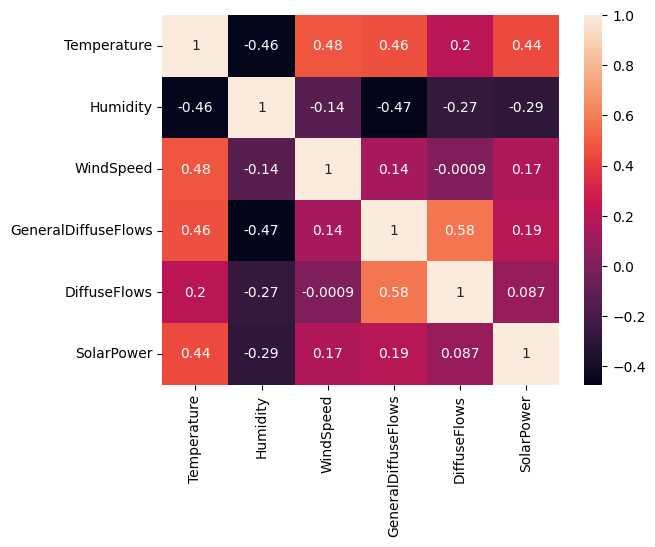

In [14]:
sns.heatmap(df.corr(), annot=True)

In [15]:
lags = range(3, 0, -1)

In [16]:
for lag in lags:
    for column in features + [target]:
        df[f"{column}_{lag}"] = df[column].shift(lag)
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,SolarPower,Temperature_3,Humidity_3,WindSpeed_3,GeneralDiffuseFlows_3,...,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,SolarPower_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,SolarPower_1
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01 00:00:00,6.184833,75.066667,0.081833,0.063500,0.098833,29197.974683,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01 01:00:00,5.548833,77.533333,0.082000,0.056833,0.112500,24657.215190,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.184833,75.066667,0.081833,0.063500,0.098833,29197.974683
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,NaN,NaN,NaN,NaN,...,0.081833,0.063500,0.098833,29197.974683,5.548833,77.533333,0.082000,0.056833,0.112500,24657.215190
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,6.184833,75.066667,0.081833,0.063500,...,0.082000,0.056833,0.112500,24657.215190,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,5.548833,77.533333,0.082000,0.056833,...,0.082333,0.063000,0.129167,22083.037973,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 19:00:00,9.453333,62.395833,0.074667,0.052000,0.102000,37513.814957,14.255000,41.716667,0.077167,226.316667,...,0.077833,81.493333,103.070000,33979.214195,10.771667,58.323333,0.076500,3.185833,3.251500,37929.531053
2017-12-30 20:00:00,9.041667,63.990000,0.080333,0.052667,0.105000,37008.871988,13.775000,44.448333,0.077833,81.493333,...,0.076500,3.185833,3.251500,37929.531053,9.453333,62.395833,0.074667,0.052000,0.102000,37513.814957
2017-12-30 21:00:00,8.011667,69.675000,0.081500,0.073167,0.098333,35358.174905,10.771667,58.323333,0.076500,3.185833,...,0.074667,0.052000,0.102000,37513.814957,9.041667,63.990000,0.080333,0.052667,0.105000,37008.871988


In [17]:
df.drop(columns=features, inplace=True)

In [18]:
df.dropna(axis=0, inplace=True)

In [19]:
df

,SolarPower,Temperature_3,Humidity_3,WindSpeed_3,GeneralDiffuseFlows_3,DiffuseFlows_3,SolarPower_3,Temperature_2,Humidity_2,WindSpeed_2,GeneralDiffuseFlows_2,DiffuseFlows_2,SolarPower_2,Temperature_1,Humidity_1,WindSpeed_1,GeneralDiffuseFlows_1,DiffuseFlows_1,SolarPower_1
Date,,,,,,,,,,,,,,,,,,,
2017-01-01 03:00:00,20811.139240,6.184833,75.066667,0.081833,0.063500,0.098833,29197.974683,5.548833,77.533333,0.082000,0.056833,0.112500,24657.215190,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973
2017-01-01 04:00:00,20475.949367,5.548833,77.533333,0.082000,0.056833,0.112500,24657.215190,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240
2017-01-01 05:00:00,20807.088607,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367
2017-01-01 06:00:00,21648.607595,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,4.741667,75.233333,0.081000,0.065833,0.118833,20807.088607
2017-01-01 07:00:00,18540.759495,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,4.741667,75.233333,0.081000,0.065833,0.118833,20807.088607,4.571667,75.750000,0.082167,0.061667,0.125500,21648.607595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 19:00:00,37513.814957,14.255000,41.716667,0.077167,226.316667,201.666667,28546.514577,13.775000,44.448333,0.077833,81.493333,103.070000,33979.214195,10.771667,58.323333,0.076500,3.185833,3.251500,37929.531053
2017-12-30 20:00:00,37008.871988,13.775000,44.448333,0.077833,81.493333,103.070000,33979.214195,10.771667,58.323333,0.076500,3.185833,3.251500,37929.531053,9.453333,62.395833,0.074667,0.052000,0.102000,37513.814957
2017-12-30 21:00:00,35358.174905,10.771667,58.323333,0.076500,3.185833,3.251500,37929.531053,9.453333,62.395833,0.074667,0.052000,0.102000,37513.814957,9.041667,63.990000,0.080333,0.052667,0.105000,37008.871988


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X, y = df.drop(columns=[target]), df[target]

In [22]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=False)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [25]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

In [26]:
lag = 3
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(6986, 3, 6)

In [27]:
train_X = train_X.reshape((train_X.shape[0], lag, (train_X.shape[1] // lag)))
test_X = test_X.reshape((test_X.shape[0], lag, (test_X.shape[1] // lag)))

In [28]:
from keras.api.models import Sequential
from keras.api.layers import Input, LSTM, Dense

In [29]:
train_X.shape

(6986, 3, 6)

In [30]:
model = Sequential([
    Input((train_X.shape[1], train_X.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 3, 64)               │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,625 (119.63 KB)

 Trainable params: 30,625 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [ ]:
history = model.fit(train_X, train_y, validation_split=0.20, epochs=10, batch_size=64, shuffle=False)

Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0021 - val_mean_squared_error: 0.0021
Epoch 2/10
43/88 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0020 - mean_squared_error: 0.0020

In [ ]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [41]:
pred_y = model.predict(test_X)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [42]:
pred_y = scaler.inverse_transform(pred_y)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(np.float64(1361.7660402910942),
 np.float64(2827364.696847326),
 0.9241636591898923)

<Axes: xlabel='Date'>

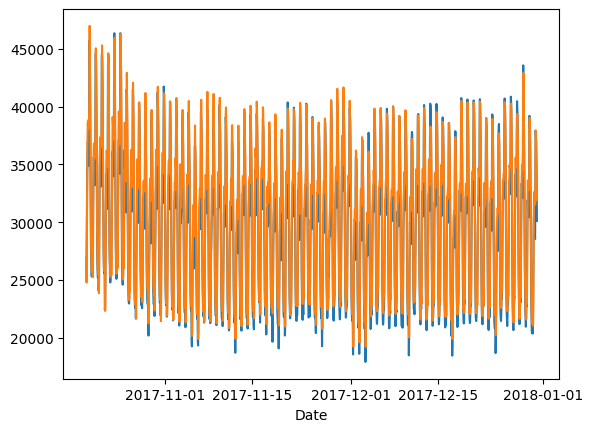

In [44]:
sns.lineplot(x=test_y.index, y=test_y.values)
sns.lineplot(x=test_y.index, y=pred_y.flatten())